# Principal componenet analysis (PCA) 
###### pca function of sklearn.decomposition library however feature should be standardized e.g transform to unit scale mean=0,variance=1 for which StandardScalar function to sklearn preprocessing library can be used.
following is this code using the iris dataset PCA should be apply on the predictor the target class variable can be used to visulize the principal components 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
iris = datasets.load_iris()
predictors = iris.data[:,0:4]
target = iris.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
predictors = StandardScaler().fit_transform(predictors) # standardize the feature
pca = PCA(n_components=2)
pricomp = pca.fit_transform(predictors)
pricomp_ds = pd.DataFrame(data=pricomp,columns=['PC 1','PC 2']) 
pricomp_ds

,PC 1,PC 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [10]:
targer_ds = pd.DataFrame(data=target,columns=['class'])
data_mod = pd.concat([pricomp_ds.reset_index(drop=True),targer_ds],axis=1)
data_mod

,PC 1,PC 2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


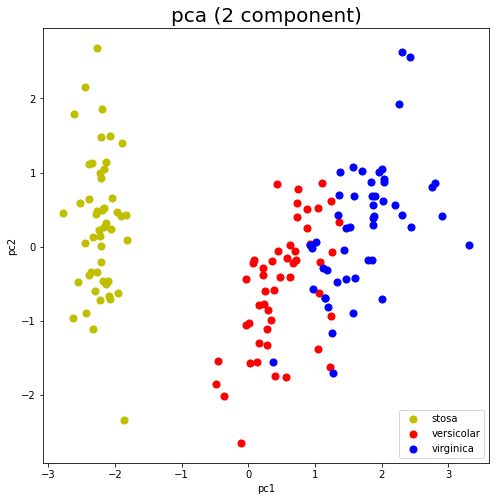

In [14]:
fig = plt.figure(figsize=(8,8))
pca_plot = fig.add_subplot(1,1,1)
pca_plot.set_xlabel('pc1')
pca_plot.set_ylabel('pc2')
pca_plot.set_title('pca (2 component)',fontsize=20)
classes = [0,1,2]
colors = ['y','r','b']
for target, color in zip(classes,colors):
    indices = data_mod['class'] == target
    pca_plot.scatter(data_mod.loc[indices,'PC 1'],
                     data_mod.loc[indices,'PC 2'],
                     c = color,
                     s = 50)
legends = ['stosa','versicolar','virginica']
pca_plot.legend(legends)